In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-data-analysis/UberDataset.csv


## Read Data

In [2]:
data = pd.read_csv('/kaggle/input/uber-data-analysis/UberDataset.csv')

In [3]:
import matplotlib.pyplot as plt

In [4]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
print(data.describe())

              MILES
count   1156.000000
mean      21.115398
std      359.299007
min        0.500000
25%        2.900000
50%        6.000000
75%       10.400000
max    12204.700000


In [7]:
print(data['CATEGORY'].value_counts())

Business    1078
Personal      77
Name: CATEGORY, dtype: int64


In [8]:
total_miles = data['MILES'].sum()
print('Total miles driven:', total_miles)

Total miles driven: 24409.4


In [9]:
avg_miles_per_trip = data['MILES'].mean()
print('Average miles per trip:', avg_miles_per_trip)

Average miles per trip: 21.115397923875435


In [10]:
missing_purpose_count = data['PURPOSE'].isnull().sum()
print('Number of missing values in PURPOSE column:', missing_purpose_count)

Number of missing values in PURPOSE column: 503


## Visualization

In [11]:
df = pd.read_csv('/kaggle/input/uber-data-analysis/UberDataset.csv')

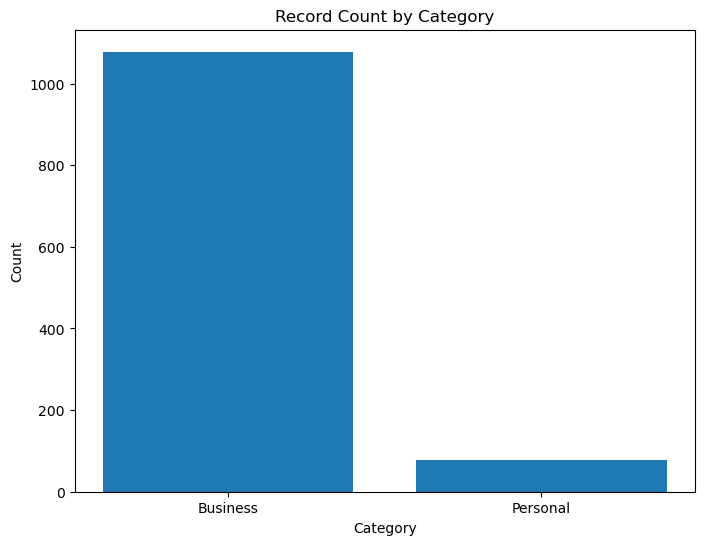

In [12]:
category_counts = df['CATEGORY'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Record Count by Category')
plt.show()

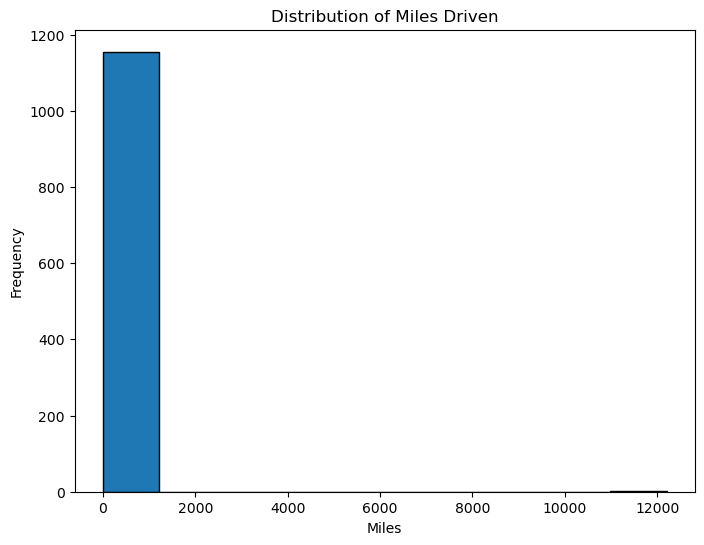

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(df['MILES'], bins=10, edgecolor='black')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.title('Distribution of Miles Driven')
plt.show()

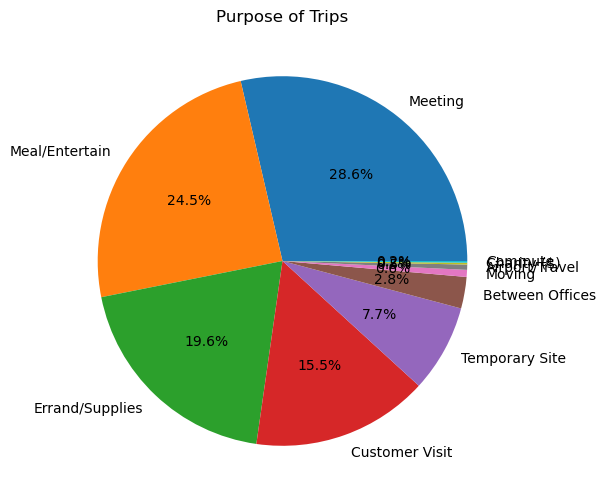

In [14]:
purpose_counts = df['PURPOSE'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(purpose_counts.values, labels=purpose_counts.index, autopct='%1.1f%%')
plt.title('Purpose of Trips')
plt.show()

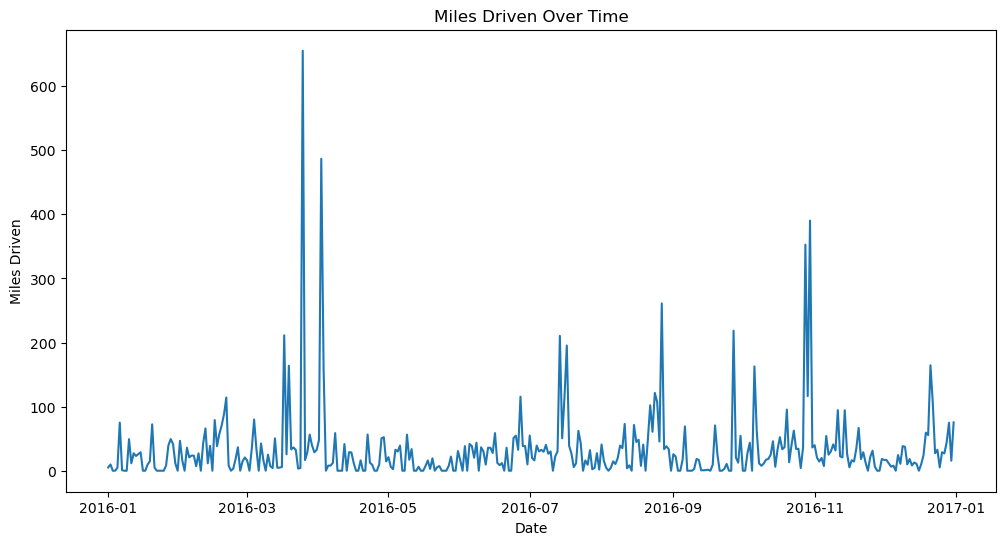

In [15]:
df = df[df['START_DATE'] != "Totals"]

df['START_DATE'] = pd.to_datetime(df['START_DATE'])

df.set_index('START_DATE', inplace=True)

daily_miles = df.resample('D')['MILES'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_miles.index, daily_miles.values)
plt.xlabel('Date')
plt.ylabel('Miles Driven')
plt.title('Miles Driven Over Time')
plt.show()

<Figure size 1000x600 with 0 Axes>

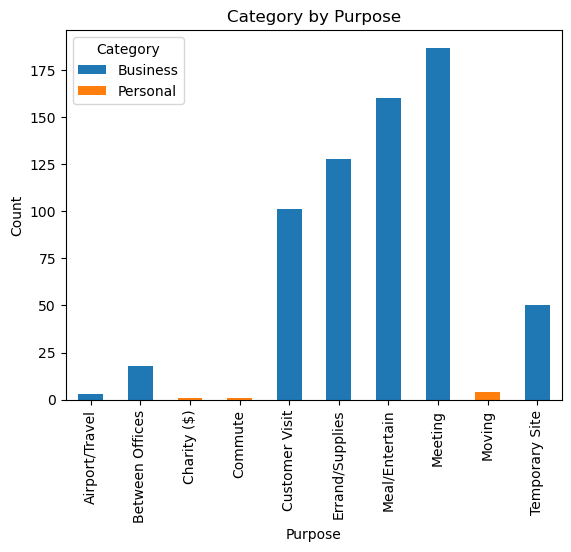

In [16]:
category_purpose = df.pivot_table(index='PURPOSE', columns='CATEGORY', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
category_purpose.plot(kind='bar', stacked=True)
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Category by Purpose')
plt.legend(title='Category')
plt.show()

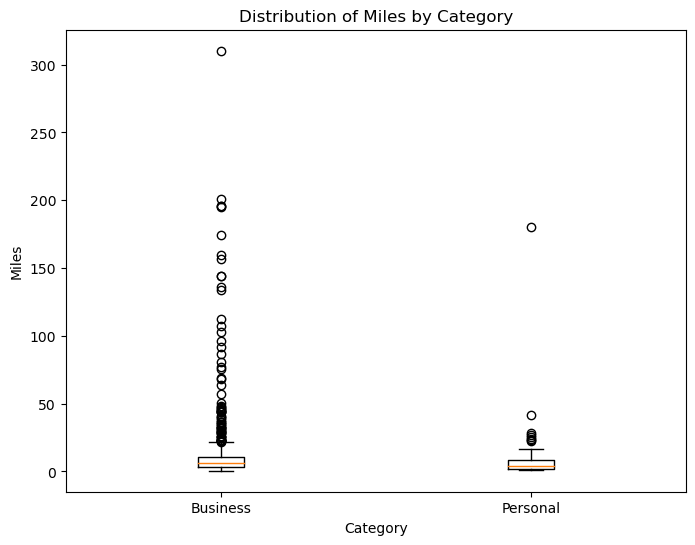

In [17]:
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['CATEGORY'] == 'Business']['MILES'], df[df['CATEGORY'] == 'Personal']['MILES']], labels=['Business', 'Personal'])
plt.xlabel('Category')
plt.ylabel('Miles')
plt.title('Distribution of Miles by Category')
plt.show()

## Training Model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.impute import SimpleImputer
from catboost import CatBoostRegressor
import lightgbm as lgb

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [19]:
import seaborn as sns

In [20]:
df = pd.read_csv('/kaggle/input/uber-data-analysis/UberDataset.csv')

In [21]:
features = ['START', 'STOP', 'CATEGORY', 'PURPOSE']

In [22]:
X = df[features]
X = pd.get_dummies(X) 
y = df['MILES']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'Linear SVR' : LinearSVR(),
}

Results for Linear Regression:
Mean Squared Error: 9.940288341399417e+27
R-squared Score: -2.3136597152945254e+25


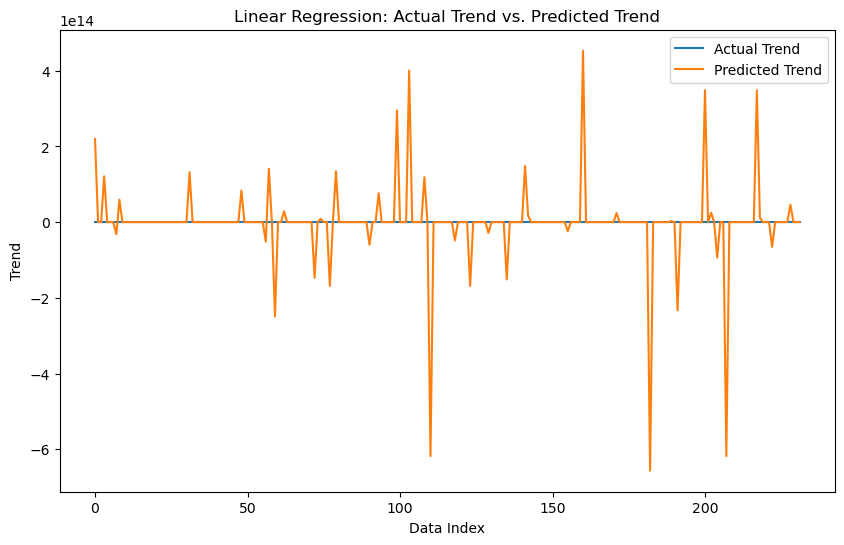


Results for Decision Tree:
Mean Squared Error: 423.1284254915529
R-squared Score: 0.015144069434524399


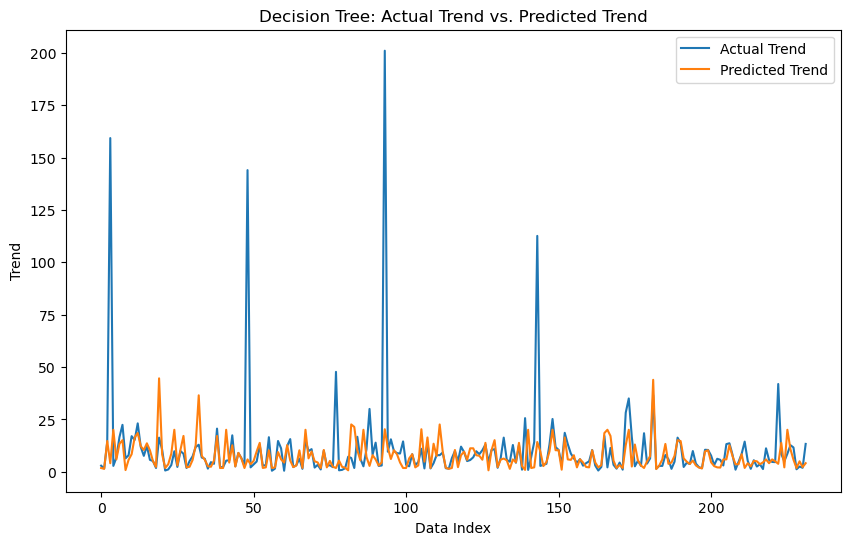


Results for Random Forest:
Mean Squared Error: 368.9113963205758
R-squared Score: 0.14133734669933462


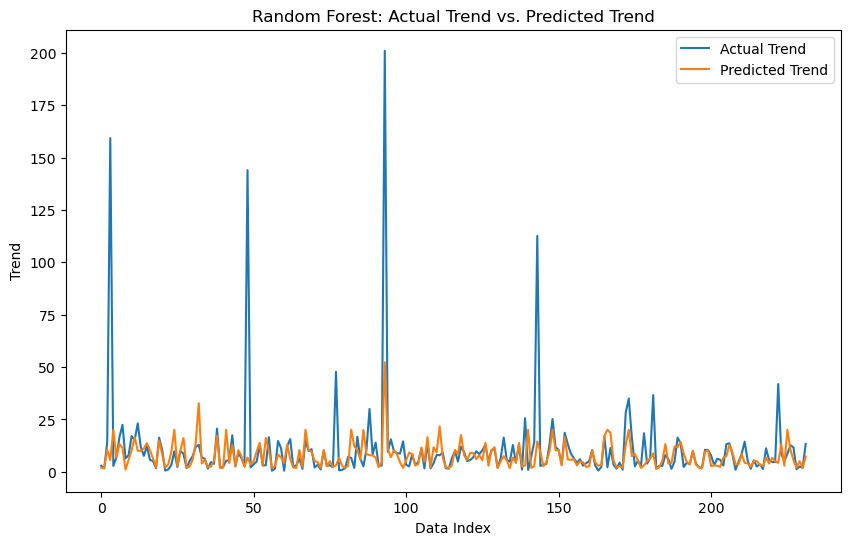


Results for SVR:
Mean Squared Error: 428.6942224068472
R-squared Score: 0.0021893545770135248


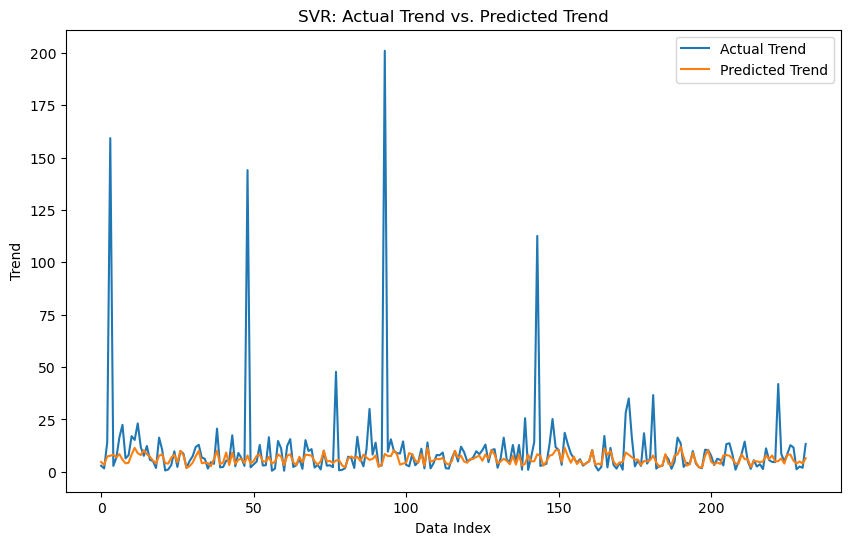


Results for XGBoost:
Mean Squared Error: 280.3095159348669
R-squared Score: 0.34756335776381775


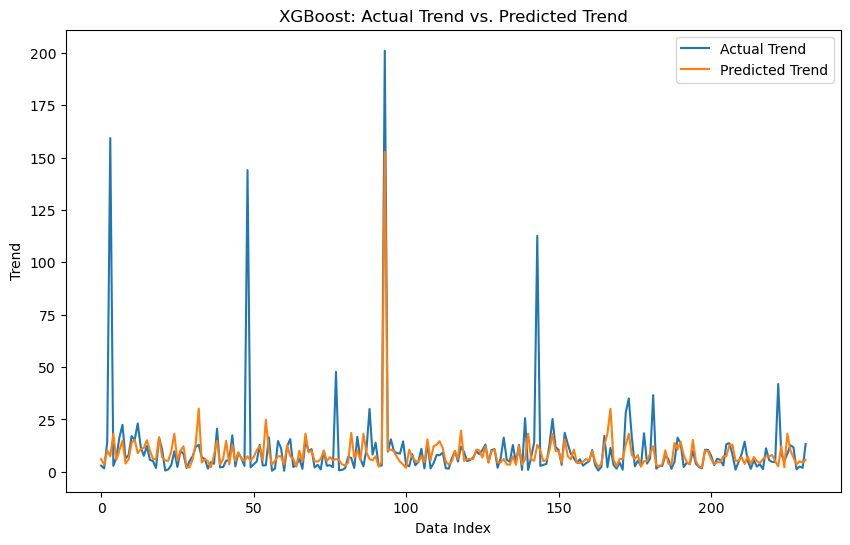


Results for LightGBM:
Mean Squared Error: 1306.2336425059377
R-squared Score: -2.040334498991957


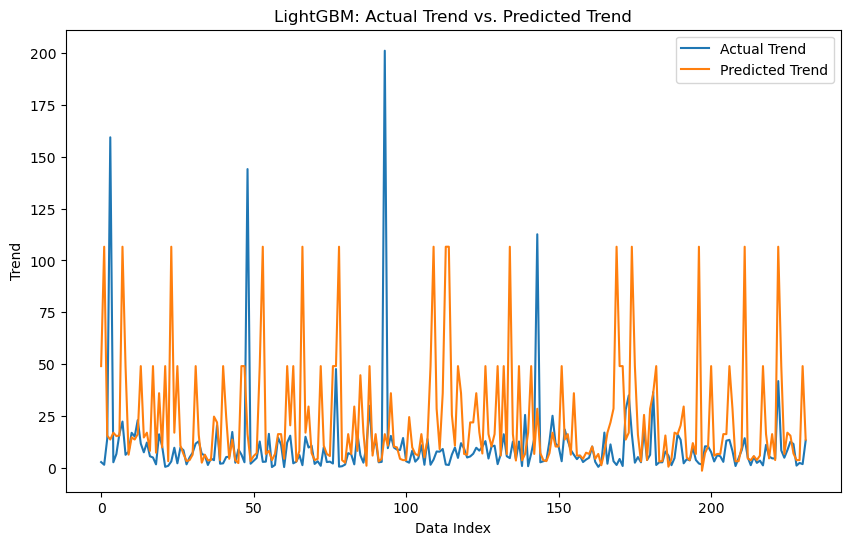


Results for Gradient Boosting Regressor:
Mean Squared Error: 383.70759325390407
R-squared Score: 0.10689834089944206


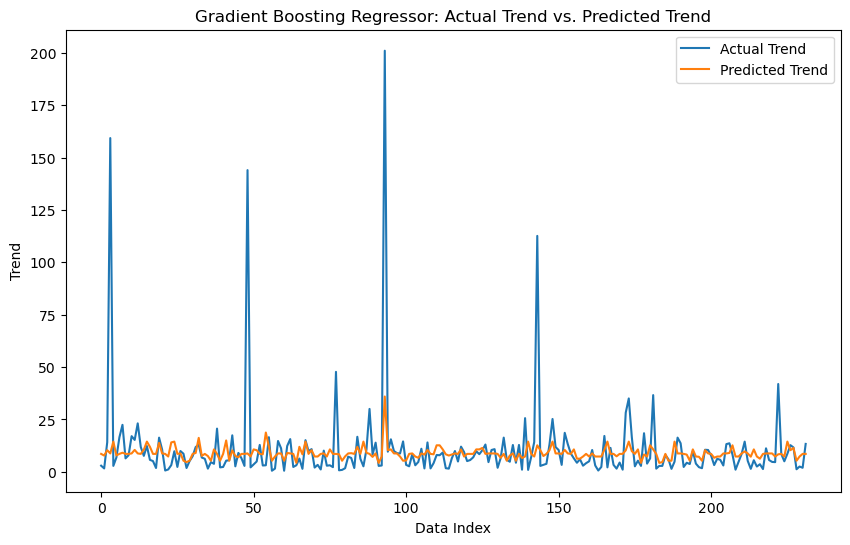


Results for ADA Boost:
Mean Squared Error: 1218.636180030987
R-squared Score: -1.8364463288206427


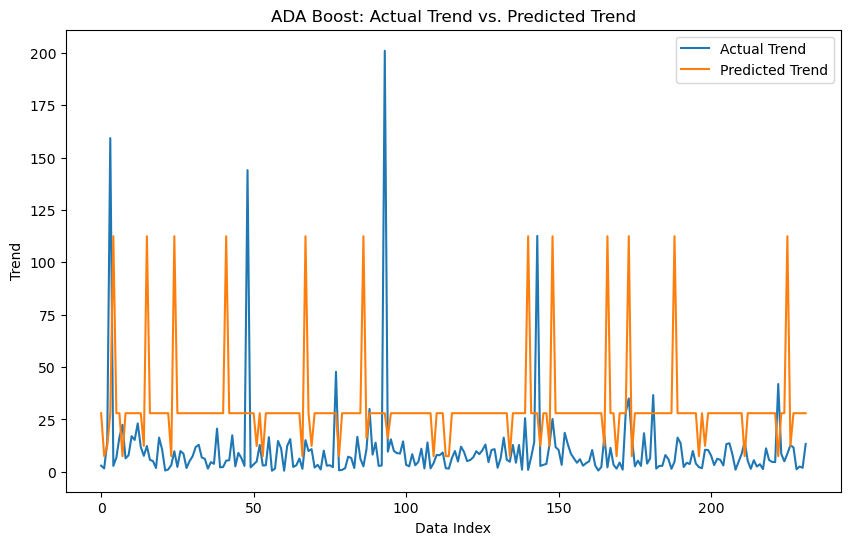


Results for Linear SVR:
Mean Squared Error: 423.25509831302
R-squared Score: 0.014849231101886962


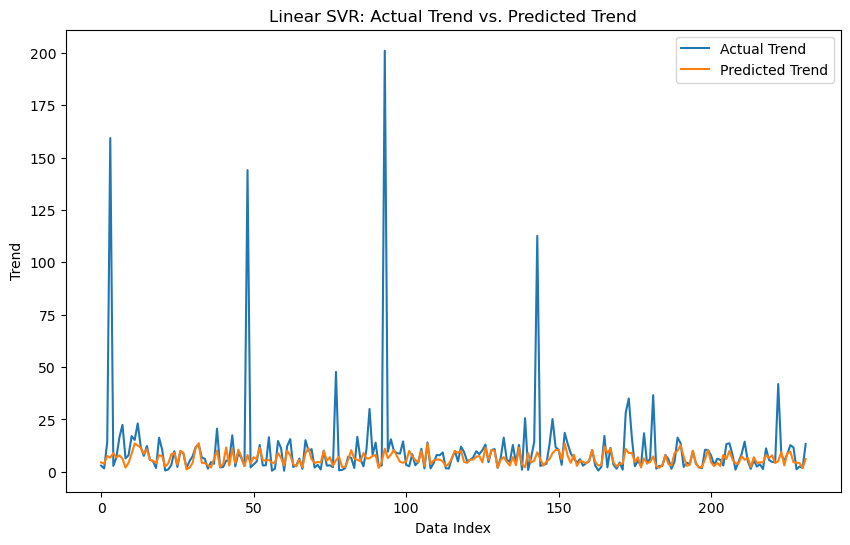

In [25]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost','Linear SVR']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Results for {name}:")
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    accuracy.append(r2)
    print()

### Compare diffrent and use which fits most